# Global Warming Project

## ENSAE - Python 

In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn, bokeh
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk
sns.set_style('whitegrid')
%matplotlib inline

# machine learning sklearn
from sklearn import linear_model 
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#machine learning xgboost
import xgboost 

print ("Success")

Success


C:\Users\Jean-Michel\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## First visualisations of the data

In [2]:
# get global temp csv file as a DataFrame
global_temps = pd.read_csv("GlobalTemperatures.csv", sep=',')

# preview the data
global_temps.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Delete all columns except dates, Land Average Temperatures, Land Average Temperature Uncertainty
global_temps=global_temps.drop(global_temps.columns[3:], axis=1)

#Delete all empty lines
global_temps=global_temps.dropna()


In [4]:
#Resizing the datasets, we only keep the year averages

date=global_temps['dt'].apply(lambda x: x[:4])
years = np.unique(date)
mean_temps_global=[]
mean_temps_uncertainty=[]

for y in years:
    
    mean_temps_global.append(global_temps[y==date]['LandAverageTemperature'].mean())
    mean_temps_uncertainty.append(global_temps[y==date]['LandAverageTemperatureUncertainty'].mean())
    
#Defining a function that classifies the average temperatures 

def heat(x):

    if type(x) is str:
        return x
    elif x<=7:
        return 3
    elif x>7 and x<=8:
        return 2
    else:
        return 1

#Building of a new, simpler dataframe

years=pd.to_numeric(years)

d1={'Dates': pd.Series(years),'Temperatures':pd.Series(mean_temps_global),'Uncertainty':pd.Series(mean_temps_uncertainty)}

df_global_mean=pd.DataFrame(d1)

#Adding the heat function 

e=df_global_mean.applymap(heat)

d2={'Dates': pd.Series(years),'Temperatures':pd.Series(mean_temps_global),'Uncertainty':pd.Series(mean_temps_uncertainty),
    'Heat':e['Temperatures']}

df_global_mean=pd.DataFrame(d2)

In [5]:
#Global Average Temperatures plot using Bokeh

from bokeh.io import output_notebook
from bokeh.charts import Scatter, show
from bokeh.plotting import figure
output_notebook()
p = Scatter(df_global_mean, x='Dates', y='Temperatures', color='Heat', legend=None, background_fill_color="white",title="Evolution of average global land temperatures since 1750")

show(p)

Loading BokehJS ...

In [6]:
#Now, we plot the 95% Uncertainty regarding the temperature evolution

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Circle, HoverTool, CustomJS
from bokeh.io import output_notebook

output_notebook()

(x, y) = (df_global_mean['Dates'], df_global_mean['Uncertainty'])

# Basic plot setup
p = figure(width=800, height=600, toolbar_location=None, title='A clear decreasing of uncertainty')

p.line(x, y, line_dash="4 4", line_width=1, color='gray')


# Add a circle, that is visible only when selected
source = ColumnDataSource({'x': x, 'y': y})
invisible_circle = Circle(x='x', y='y', fill_color='gray', fill_alpha=0.05, line_color=None, size=20)
visible_circle = Circle(x='x', y='y', fill_color='firebrick', fill_alpha=0.5, line_color=None, size=20)
cr = p.add_glyph(source, invisible_circle, selection_glyph=visible_circle, nonselection_glyph=invisible_circle)

# Add a hover tool, that selects the circle
code = "source.set('selected', cb_data['index']);"
callback = CustomJS(args={'source': source}, code=code)
p.add_tools(HoverTool(tooltips=None, callback=callback, renderers=[cr], mode='hline'))

show(p)

Loading BokehJS ...

In [7]:
#Loading the Min and Max data

global_temps2 = pd.read_csv("GlobalTemperatures.csv", sep=',')

# Starting in 1800 when data is more significant (less NaN)

list_of_years_1800=years[50:]

# Compute Average, Max, Min Temperature by Year since 1800

date=global_temps2['dt'].apply(lambda x: x[:4])
list_of_years_1800=np.unique(date)
list_of_years_1800=list_of_years_1800[50:]

mean_temps_1800=[]
min_temps_1800=[]
max_temps_1800=[]

for y in list_of_years_1800:
    
    mean_temps_1800.append(global_temps2[y==date]['LandAverageTemperature'].mean())
    max_temps_1800.append(global_temps2[y==date]['LandMaxTemperature'].mean())
    min_temps_1800.append(global_temps2[y==date]['LandMinTemperature'].mean())

#Building of a new, simpler dataframe

list_of_years_1800=pd.to_numeric(list_of_years_1800)

d1={'Average Temperature':pd.Series(mean_temps_1800), 'Dates': pd.Series(list_of_years_1800),
   'Min Temperature':pd.Series(min_temps_1800),'Max Temperature':pd.Series(max_temps_1800)}

global_temps_1800=pd.DataFrame(d1)

global_temps_1800=global_temps_1800[['Dates','Average Temperature','Min Temperature','Max Temperature']]


In [8]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Circle, HoverTool, CustomJS
from bokeh.io import output_notebook

output_notebook()

x = global_temps_1800['Dates']
y = global_temps_1800['Average Temperature']
z = global_temps_1800['Min Temperature']
t = global_temps_1800['Max Temperature']

p = figure(plot_width=600, plot_height=600)


p.line(x, y, legend="Average Temperature", line_color="green", line_width=3)

p.line(x,z, legend="Min Temperature", line_color="blue", line_width=3)

p.line(x, t, legend="Max Temperature", line_color="red", line_width=3)

# change just some things about the x-grid
p.xgrid.band_fill_alpha = 0.05
p.xgrid.band_fill_color = "navy"

p.legend.location = "top_left"
p.legend.glyph_width = 2
p.legend.label_width=2


show(p)

Loading BokehJS ...

## Linear Regression

In [9]:
#Regression on all the data (without prediction) => See if a regression can be a good estimation

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


#Define the input and output
temp=global_temps_1800['Average Temperature']
time=global_temps_1800['Dates']


# The data sets
dates_X = time.iloc[0:,]

# The targets 
temperature_y = temp.iloc[0:,]

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the data sets
reg.fit(dates_X.to_frame(),temperature_y.to_frame())

# The estimation
output_reg=reg.predict(dates_X.to_frame())
output_simple=np.copy(output_reg)
output=pd.DataFrame(index=pd.DataFrame(output_simple).index.values)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)


# The mean squared error
print("Mean squared error: %.2f" % np.mean((reg.predict(dates_X.to_frame()) - temperature_y.to_frame()) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(dates_X.to_frame(), temperature_y.to_frame()))


Coefficients: 
 [[ 0.00721859]]
Intercept: 
 [-5.35578585]
Mean squared error: 0.12
Variance score: 0.64


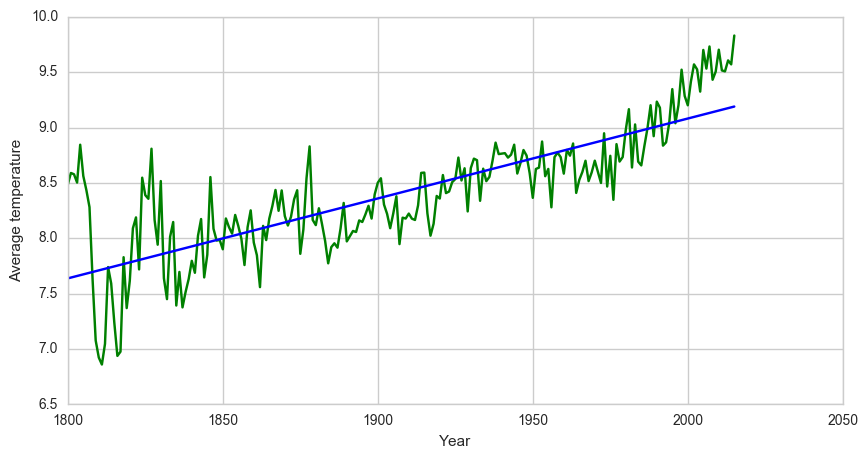

In [10]:
# Linear regression cuve on the predicted values

# Simple Linear Regression: t : Regression done on the values between 1800 and 1950 and testes between 1950 and 2016
fig, axes = plt.subplots(figsize=(10,5))
axes.set_ylabel('Average temperature')
axes.set_xlabel('Year')
plt.plot(dates_X, temperature_y, label='Annual Mean temperature', color='g')
plt.plot(dates_X,output_simple,label='Forecast Temperature by Regression',color='b')

In [11]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

#Define the input and output
temp=global_temps_1800['Average Temperature']
time=global_temps_1800['Dates']

# Split the data into training/testing sets
dates_X_train = time.iloc[0:150,]
dates_X_test = time.iloc[150:,]

# Split the targets into training/testing sets
temperature_y_train = temp.iloc[0:150,]
temperature_y_test = temp.iloc[150:,]

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(dates_X_train.to_frame(),temperature_y_train.to_frame())

# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)

# The prediction
output_simple=reg.predict(dates_X_test.to_frame())
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(dates_X_test.to_frame()) - temperature_y_test.to_frame()) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(dates_X_test.to_frame(), temperature_y_test.to_frame()))


Coefficients: 
 [[ 0.00570766]]
Intercept: 
 [-2.53305848]
Mean squared error: 0.14
Variance score: 0.16


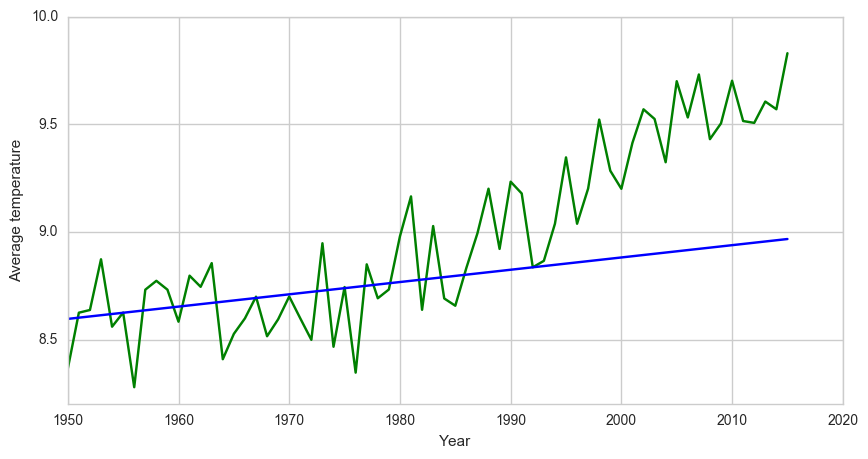

In [12]:
# Linear regression curb on the predicted values

# Simple Linear Regression: t : Regression done on the values between 1800 and 1950 and testes between 1950 and 2016
fig, axes = plt.subplots(figsize=(10,5))
axes.set_ylabel('Average temperature')
axes.set_xlabel('Year')
plt.plot(dates_X_test, temperature_y_test, label='Annual Mean temperature', color='g')
plt.plot(dates_X_test,output_simple,label='Forecast Temperature by Regression',color='b')


## Polynomial Regression

In [13]:
#Polynomial Regression t^2 + t^3

#Regression on all the data (without prediction) => See if a regression can be a good estimation

#Define the input and output
time=pd.DataFrame()
time["Dates"]=global_temps_1800['Dates']
time["Dates^2"]=global_temps_1800['Dates']*global_temps_1800['Dates']
time["Dates^3"]=global_temps_1800['Dates']*global_temps_1800['Dates']*global_temps_1800['Dates']
temp=global_temps_1800['Average Temperature']


# The data sets
dates_X = time.iloc[0:,0]

# The targets 
temperature_y = temp.iloc[0:,]

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(time.iloc[0:,],temperature_y.to_frame())

# The prediction
output_reg=reg.predict(time.iloc[0:,])
output_multiple=np.copy(output_reg)
output=pd.DataFrame(index=pd.DataFrame(output_simple).index.values)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % np.mean((output_reg - temperature_y.to_frame()) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(time.iloc[0:,], temperature_y.to_frame()))

# Euclidian Distance
output['Predicted Temperature']=pd.DataFrame(output_multiple)
output["Average Temperature"]=temp

Coefficients: 
 [[  1.54583760e+00  -8.43972200e-04   1.53912499e-07]]
Intercept: 
 [-937.81103858]
Mean squared error: 0.10
Variance score: 0.69


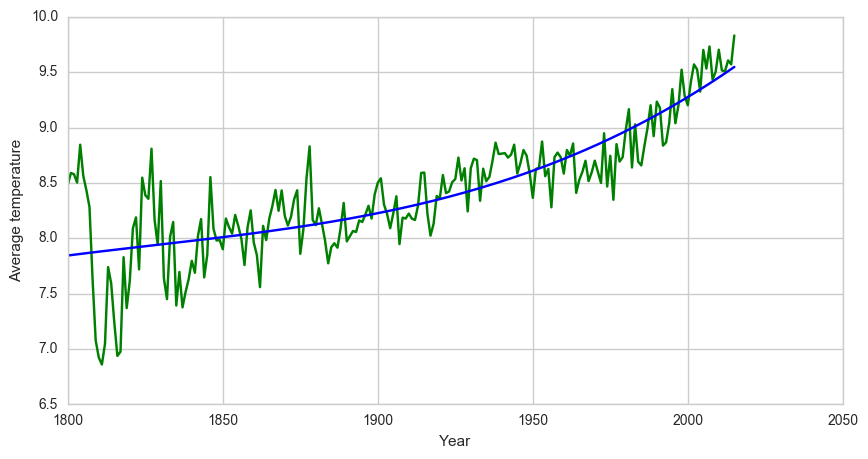

In [14]:
# Linear regression curve on the predicted values

# Multiple Linear Regression: t,t^2, t^3: Regression done on the values between 1800 and 1950 and testes between 1950 and 2016
fig, axes = plt.subplots(figsize=(10,5))
axes.set_ylabel('Average temperature')
axes.set_xlabel('Year')
plt.plot(dates_X, temperature_y, label='Annual Mean temperature', color='g')
plt.plot(dates_X,output_multiple,label='Forecast Reg',color='b')

In [15]:
#Polynomial Regression t^2 + t^3

#Define the input and output
temp=global_temps_1800['Average Temperature']
time=pd.DataFrame()
time["Dates"]=global_temps_1800['Dates']
time["Dates^2"]=global_temps_1800['Dates']*global_temps_1800['Dates']
time["Dates^3"]=global_temps_1800['Dates']*global_temps_1800['Dates']*global_temps_1800['Dates']

# Split the data into training/testing sets
dates_X_train = time.iloc[0:150,0]
dates_X_test = time.iloc[150:,0]

# Split the targets into training/testing sets
temperature_y_train = temp.iloc[0:150,]
temperature_y_test = temp.iloc[150:,]

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(time.iloc[0:150,],temperature_y_train.to_frame())

# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)

# The prediction
output_multiple=reg.predict(time.iloc[150:,])
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(time.iloc[150:,]) - temperature_y_test.to_frame()) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(time.iloc[150:,], temperature_y_test.to_frame()))

Coefficients: 
 [[ -3.37849536e+00   1.75645409e-03  -3.03542634e-07]]
Intercept: 
 [ 2168.61282323]
Mean squared error: 0.10
Variance score: 0.42


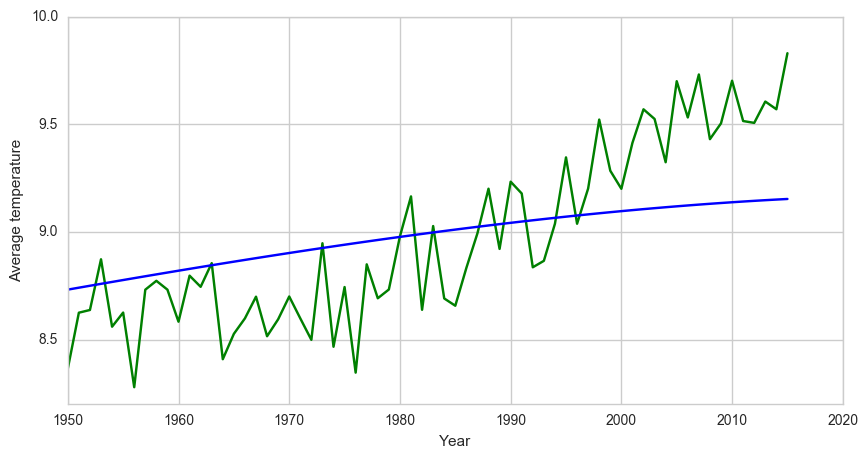

In [16]:
# Linear regression curb on the predicted values

# Multiple Linear Regression: t,t^2, t^3: Regression done on the values between 1800 and 1950 and testes between 1950 and 2016
fig, axes = plt.subplots(figsize=(10,5))
axes.set_ylabel('Average temperature')
axes.set_xlabel('Year')
# 
plt.plot(dates_X_test, temperature_y_test, label='Annual Mean temperature', color='g')
plt.plot(dates_X_test,output_multiple,label='Forecast Reg',color='b')


## Correlation Matrix


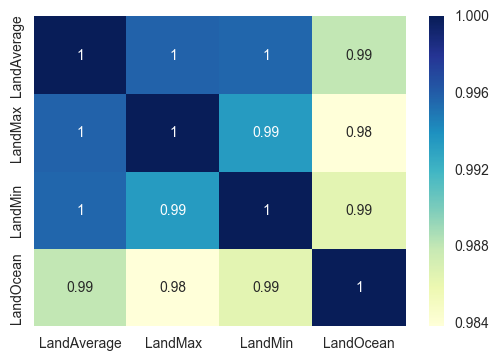

In [17]:
#Correlation Matrix for the following features : LandAverageTemperature, LandMaxTemperature, LandMinTemperature,LandAndOceanAverageTemperature

global_temperatures=pd.read_csv("GlobalTemperatures.csv", sep=',')
global_temperatures['dt'] = pd.to_datetime(global_temperatures['dt'])
global_temperatures=global_temperatures.drop(['LandAverageTemperatureUncertainty',"LandMaxTemperatureUncertainty","LandMinTemperatureUncertainty","LandAndOceanAverageTemperatureUncertainty"],axis=1)
global_temperatures=global_temperatures.dropna()
corr=global_temperatures.corr()

# Heatmap for the previous correlation matrix
sns.heatmap(corr,xticklabels=['LandAverage','LandMax','LandMin','LandOcean'], yticklabels=['LandAverage','LandMax','LandMin','LandOcean'], annot=True,cmap="YlGnBu")


## Random Forest

In [18]:
# Train
train_df_copy=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df=pd.DataFrame.copy(train_df_copy)
train_df.drop(train_df.index[:1], inplace=True)
train_df_copy.drop(train_df.index[-1],inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min, max)
for j in (train_df.index):
    for column in train_df.columns[1:-1]:
        train_df.loc[j,column]=train_df_copy.loc[j-1,column]
forest = RandomForestRegressor(n_estimators=10)
train_df=train_df.drop(['dt'],axis=1)
forest = forest.fit(train_df.drop(["LandAverageTemperature"],axis=1),train_df["LandAverageTemperature"])

In [19]:
# Test
test_df_copy=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df=pd.DataFrame.copy(test_df_copy)
test_df.drop(test_df.index[:1], inplace=True)
test_df_copy.drop(test_df.index[-1], inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (test_df.index):
    for column in test_df.columns[1:-1]:
        test_df.loc[j,column]=test_df_copy.loc[j-1,column]
test_df=test_df.drop(['dt'],axis=1)
output = forest.predict(test_df.drop(["LandAverageTemperature"],axis=1))

In [20]:
#Adding the predicted temperature to our output DF
test_df['Predicted_temp']=output

In [21]:
# Distance computing
MED=abs(test_df['LandAverageTemperature']-test_df['Predicted_temp']).mean()

In [22]:
MED

0.23238793503480268

## XGBoost

In [23]:
# Packages
import xgboost 
from xgboost import XGBRegressor

In [24]:
# Train
train_df_copy_2=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df_2=pd.DataFrame.copy(train_df_copy_2)
train_df_2.drop(train_df_2.index[:1], inplace=True)
train_df_copy_2.drop(train_df_2.index[-1], inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (train_df_2.index):
    for column in train_df_2.columns[1:-1]:
        train_df_2.loc[j,column]=train_df_copy_2.loc[j-1,column]
forest2 = XGBRegressor()
train_df_2=train_df_2.drop(['dt'],axis=1)
forest2 = forest2.fit(train_df_2.drop(["LandAverageTemperature"],axis=1),train_df_2["LandAverageTemperature"])

In [25]:
# Test
test_df_copy_2=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df_2=pd.DataFrame.copy(test_df_copy_2)
test_df_2.drop(test_df_2.index[:1], inplace=True)
test_df_copy_2.drop(test_df_2.index[-1], inplace=True)
# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (test_df_2.index):
    for column in test_df_2.columns[1:-1]:
        test_df_2.loc[j,column]=test_df_copy_2.loc[j-1,column]
test_df_2=test_df_2.drop(['dt'],axis=1)
output = forest2.predict(test_df_2.drop(["LandAverageTemperature"],axis=1))

In [26]:
# Adding the predicted temperature to our output DF
test_df_2['Predicted_temp']=output

In [27]:
# Distance computing
MED=abs(test_df_2['LandAverageTemperature']-test_df_2['Predicted_temp']).mean()

In [28]:
MED

0.20515606933735364

## Nearest neighbors


In [29]:
## Packages
from sklearn.neighbors import KNeighborsRegressor

In [30]:
# Train
neigh = KNeighborsRegressor(n_neighbors=2)
train_df_copy_3=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df_3=pd.DataFrame.copy(train_df_copy_3)
train_df_3.drop(train_df_3.index[:1], inplace=True)
train_df_copy_3.drop(train_df_3.index[-1], inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (train_df_3.index):
    for column in train_df_3.columns[1:-1]:
        train_df_3.loc[j,column]=train_df_copy_3.loc[j-1,column]
train_df_3=train_df_3.drop(['dt'],axis=1)
neighbors=neigh.fit(train_df_3.drop(["LandAverageTemperature"],axis=1),train_df_3["LandAverageTemperature"]) 

In [31]:
# Test
test_df_copy_3=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df_3=pd.DataFrame.copy(test_df_copy_3)
test_df_3.drop(test_df_3.index[:1], inplace=True)
test_df_copy_3.drop(test_df_3.index[-1], inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (test_df_3.index):
    for column in test_df_3.columns[1:-1]:
        test_df_3.loc[j,column]=test_df_copy_3.loc[j-1,column]
test_df_3=test_df_3.drop(['dt'],axis=1)
neigh_output = neighbors.predict(test_df_3.drop(["LandAverageTemperature"],axis=1))

In [32]:
# Adding the predicted temperature to our output DF
test_df_3['Predicted_temp']=neigh_output

In [33]:
MED=abs(test_df_3['LandAverageTemperature']-test_df_3['Predicted_temp']).mean()

In [34]:
MED

0.23760904872389807

## Attempt to minimize the MED

In [35]:
#Definition of the function we want to minimize

def MED_XGB(n,maxi,learn,
       X_train, y_train, X_test,y_test,
       MED_limit):
    
    '''
    n         : n_estimators  -> Number of boosted trees to fit
    maxi      : max_depth     -> Maximum tree depth for base learners
    learn     : learning_rate -> Boosting learning rate
    ...
    MED_limit : -> threshold for minimum MED required
    '''
    
    xgb_model = xgboost.XGBRegressor(n_estimators = n , learning_rate = learn, max_depth = maxi )
    model_fit = xgb_model.fit(X_train , y_train )
    y_predict = model_fit.predict(X_test)
    MED=abs(y_test-y_predict).mean()
    
    if MED<MED_limit:
        return MED , n, learn, maxi
    else:
        return 0

In [36]:
#### Data Sets ####

#Train
train_df_copy=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df=pd.DataFrame.copy(train_df_copy)
train_df.drop(train_df.index[:1], inplace=True)
train_df_copy.drop(train_df.index[-1], inplace=True)
for j in (train_df.index):
    for column in train_df.columns[1:-1]:
        train_df.loc[j,column]=train_df_copy.loc[j-1,column]

train_df=train_df.drop(['dt'],axis=1)
    
#Test
test_df_copy=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df=pd.DataFrame.copy(test_df_copy)
test_df.drop(test_df.index[:1], inplace=True)
test_df_copy.drop(test_df.index[-1], inplace=True)
for j in (test_df.index):
    for column in test_df.columns[1:-1]:
        test_df.loc[j,column]=test_df_copy.loc[j-1,column]

test_df=test_df.drop(['dt'],axis=1)


X_train = train_df.drop("LandAverageTemperature", axis = 1)
y_train = train_df['LandAverageTemperature']

X_test = test_df.drop("LandAverageTemperature", axis = 1)
y_test = test_df['LandAverageTemperature']

In [37]:
#### HyperParameters ####

max_depth = [2+i for i in range(5)]
learning_rate = [0.01*(i+1) for i in range(5)]
n_estimators = [370+i for i in range(20)]
MED_limit =  0.21
l=[]

In [38]:
#### Very long loop depending on parameters ####

for n in n_estimators:
    for learn in learning_rate:
        for maxi in max_depth:
            a = MED_XGB(n,maxi,learn,X_train,y_train,X_test,y_test,MED_limit)
            if a != 0:
                l.append(a)
                l.sort()

l[:5] # 5 Best MED Results

[(0.20242700248417334, 385, 0.04, 2),
 (0.20243673394506326, 386, 0.04, 2),
 (0.2024409026745577, 387, 0.04, 2),
 (0.20250182166398262, 384, 0.04, 2),
 (0.20251051094249892, 383, 0.04, 2)]

In [39]:
#### GridSearch (Take some time to compute) ####

from xgboost import plot_importance,to_graphviz, plot_tree
from sklearn.grid_search import GridSearchCV

xgb_model = xgboost.XGBRegressor()

clf = GridSearchCV(xgb_model,
                   {'max_depth': max_depth,
                    'n_estimators': n_estimators,
                   'learning_rate': learning_rate}, verbose=1)

clf.fit(X_train,y_train)
clf.best_score_, clf.best_params_

C:\Users\Jean-Michel\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  3.9min finished


(0.9921251007122502,
 {'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 381})

## Features importance


In [40]:
maxi = 2
learn = 0.04
n = 385

xgb_model = xgboost.XGBRegressor(max_depth = maxi,
                             learning_rate = learn,
                             n_estimators = n)

model_fit = xgb_model.fit(X_train,y_train)

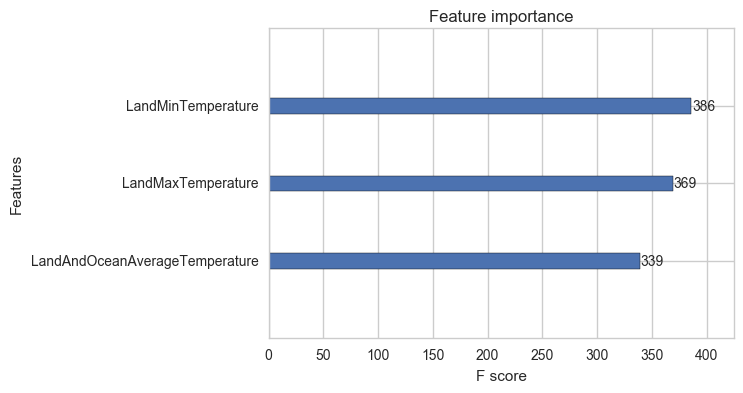

In [41]:
#Ranking the features'importance 
plot_importance(model_fit)

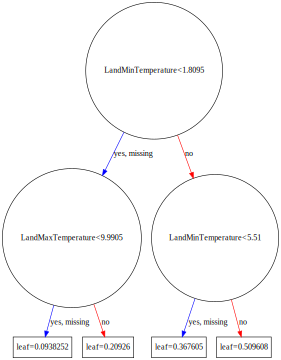

In [42]:
#Plotting of the tree that would predict with the highest accuracy 
#The most discriminatory variable, LandMinTemperature is naturally at the top of the tree
to_graphviz(model_fit,size="5")

## New variables and decreasing of the MED
  

In [43]:
# Adding the CO2 level as a a feature

CO2=pd.read_csv("co2-mm-mlo.csv",sep=",")

# We drop the year 2016 since we don't have the temperatures of 2016
CO2 = CO2.drop(CO2.index[-10:])
CO2["Date"]=CO2["Date"]+"-01"
CO2["Date"]=pd.to_datetime(CO2["Date"])
CO2=CO2.drop(["Decimal Date","Interpolated","Trend","Number of Days"],axis=1)

# We merge the temperatures data with the CO2 data and we keep 
#only the months where we have the average CO2 levels
temperatures=pd.merge(left=global_temperatures,right=CO2, left_on='dt', right_on='Date', how='outer')
temp=pd.DataFrame.copy(temperatures[temperatures['dt'].map(lambda x: x.year)<1980])
temp=temp.dropna()

##### Random Forest

In [44]:
#Sets

# Train
train_df_copy=pd.DataFrame.copy(temp)
train_df=pd.DataFrame.copy(train_df_copy)
train_df.drop(train_df.index[:1], inplace=True)
train_df_copy.drop(train_df.index[-1], inplace=True)

X_train = train_df.drop(["LandAverageTemperature","dt","Date"], axis = 1)
y_train = train_df['LandAverageTemperature']

# Test
test_df_copy=pd.DataFrame.copy(temperatures[temperatures['dt'].map(lambda x: x.year)>=1980])
test_df=pd.DataFrame.copy(test_df_copy)
test_df.drop(test_df.index[:1], inplace=True)
test_df_copy.drop(test_df.index[-1], inplace=True)

X_test = test_df.drop(["LandAverageTemperature","dt","Date"],axis = 1 )
y_test = test_df['LandAverageTemperature']

In [45]:
#Definition of the Minimization Function

def MED_RF(n,maxi,
       X_train, y_train, X_test,y_test,
       MED_limit):
    
#Note that there is no learning_rate for the random forest regressor
    
    '''
    n         : n_estimators  -> Number of boosted trees to fit
    maxi      : max_depth     -> Maximum tree depth for base learners
    ...
    MED_limit : -> threshold for minimum MED required
    '''
    
    forest = RandomForestRegressor(n_estimators=n,max_depth = maxi)
    model_fit = forest.fit(X_train , y_train )
    y_predict = model_fit.predict(X_test)
    MED=abs(y_test-y_predict).mean()
    
    if MED<MED_limit:
        return MED, n, maxi
    else:
        return 0

In [46]:
#Hyperparameters

max_depth = [8+i for i in range(7)]
n_estimators = [i+1 for i in range(100)]
MED_limit = 0.2
l=[]

In [47]:
#### Minimization (Very long loop depending on parameters) ####

for n in n_estimators:
    for maxi in max_depth:
        a = MED_RF(n,maxi,X_train,y_train,X_test,y_test,MED_limit)
        if a != 0:
            l.append(a)
            l.sort()

l[:5] # 5 Best MED Results

[(0.12805185110461015, 23, 13),
 (0.13384931231904434, 36, 9),
 (0.1344451730051446, 92, 13),
 (0.1360461221964427, 25, 10),
 (0.1361788863109051, 20, 13)]

In [48]:
# GridSearch (very long)

clf = GridSearchCV(forest,
                   {'max_depth': max_depth,
                    'n_estimators': n_estimators}, verbose=1)

clf.fit(X_train,y_train)
clf.best_score_, clf.best_params_

Fitting 3 folds for each of 700 candidates, totalling 2100 fits


[Parallel(n_jobs=1)]: Done 2100 out of 2100 | elapsed:  2.0min finished


(0.9994277108488541, {'max_depth': 14, 'n_estimators': 54})

In [49]:
#Random Forest (GridSearch MED Test)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max) and the CO2 level of the current year
for j in (train_df.index):
    for column in train_df.columns[1:-2]:
        train_df.loc[j,column]=train_df_copy.loc[j-1,column]
forest = RandomForestRegressor(max_depth=10,n_estimators=462)
train_df=train_df.drop(['dt',"Date"],axis=1)
forest = forest.fit(train_df.drop(["LandAverageTemperature"],axis=1),train_df["LandAverageTemperature"])

for j in (test_df.index):
    for column in test_df.columns[1:-2]:
        test_df.loc[j,column]=test_df_copy.loc[j-1,column]
test_df=test_df.drop(['dt',"Date"],axis=1)
output = forest.predict(test_df.drop(["LandAverageTemperature"],axis=1))

# Distance computing
test_df['Predicted_temp']=output
MED=abs(test_df['LandAverageTemperature']-test_df['Predicted_temp']).mean()
MED


0.15244176521442088

##### XGBoost

In [50]:
#Sets

# Train
train_df_copy_2=pd.DataFrame.copy(temperatures[temperatures['dt'].map(lambda x: x.year)<1980])
train_df_2=pd.DataFrame.copy(train_df_copy_2)
train_df_2.drop(train_df_2.index[:1], inplace=True)
train_df_copy_2.drop(train_df_2.index[-1], inplace=True)

# Test
test_df_copy_2=pd.DataFrame.copy(temperatures[temperatures['dt'].map(lambda x: x.year)>=1980])
test_df_2=pd.DataFrame.copy(test_df_copy_2)
test_df_2.drop(test_df_2.index[:1], inplace=True)
test_df_copy_2.drop(test_df_2.index[-1], inplace=True)


In [51]:
#XGBoost (GridSearch MED Test)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min, max) and the CO2 level of the current year

for j in (train_df_2.index):
    for column in train_df_2.columns[1:-2]:
        train_df_2.loc[j,column]=train_df_copy_2.loc[j-1,column]
forest2 = XGBRegressor()
forest2 = forest2.fit(train_df_2.drop(["LandAverageTemperature","dt","Date"],axis=1),train_df_2["LandAverageTemperature"])


for j in (test_df_2.index):
    for column in test_df_2.columns[1:-2]:
        test_df_2.loc[j,column]=test_df_copy_2.loc[j-1,column]
output = forest2.predict(test_df_2.drop(["LandAverageTemperature","dt","Date"],axis=1))

# Distance computing
test_df['Predicted_temp']=output
MED=abs(test_df['LandAverageTemperature']-test_df['Predicted_temp']).mean()
MED

0.2840593118070175

In [52]:
#Hyperparameters

max_depth = [2+i for i in range(4)]
learning_rate = [0.01+0.01*i for i in range(5)]
n_estimators = [450+i*10 for i in range(10)]
MED_limit = 2
l=[]

In [53]:
#### Minimization (Very long loop depending on parameters) ####

for n in n_estimators:
    for learn in learning_rate:
        for maxi in max_depth:
            a = MED_XGB(n,maxi,learn,X_train,y_train,X_test,y_test,MED_limit)
            if a != 0:
                l.append(a)
                l.sort()

l[:5] # 5 Best MED Results

[(1.5388746226503234, 490, 0.02, 4),
 (1.5389707357092408, 500, 0.02, 4),
 (1.5391196051551124, 510, 0.02, 4),
 (1.5391782342286782, 540, 0.04, 4),
 (1.5391959109029745, 480, 0.02, 4)]

In [54]:
# GridSearch (very long)

clf = GridSearchCV(forest2,
                   {'max_depth': max_depth,
                    'n_estimators': n_estimators,
                   'learning_rate': learning_rate}, verbose=1)

clf.fit(X_train,y_train)
clf.best_score_, clf.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   48.8s finished


(0.9227900204652463,
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 450})

# Clustering 

### Preparing the DataFrame

In [55]:
country_temps = pd.read_csv("GlobalLandTemperaturesByCountry.csv", sep=',')

#Drop Uncertainty for the clustering

country_temps = country_temps.drop("AverageTemperatureUncertainty", axis = 1)

# Delete all empty lines, change time, and put time as Index

country_temps['dt'] = pd.to_datetime(country_temps['dt'])

country_temps.tail()

#Setting the Countries as Index, time as Columns and Average Temperature as the main Data
pivot = country_temps.pivot("Country","dt","AverageTemperature")

pivot = pivot.drop(pivot.columns[[i for i in range(1274)]+[3238]], axis = 1)

"""
    Data before 1850 is deleted because 
    
    *30%  of Database is NaN if dt starts at 1773
    *18%  of Database is NaN if dt starts at 1800
    *5.2% of Database is NaN if dt starts at 1850
    
    Numbers obtained doing :
        -> np.count_nonzero(~np.isnan(pivot))
    
    Plus, the last month (9/2013) doesn't have any data
    
"""

pivot.head()

#Getting rid of all countries with no data

pivot = pivot.dropna(how='all') #aucune donnée pour le pays

#Only one country eliminated

### Country Clustering

##### Adding Median to missing values

In [56]:
from sklearn.preprocessing import Imputer

imp = Imputer(strategy="median", axis = 1)
# Beware: here axis = 1 means rows -> http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html


#Imputer changes type of DataFrame. 

trans_pivot = imp.fit_transform(pivot)
nonan_pivot = pd.DataFrame(trans_pivot)

nonan_pivot.columns = pivot.columns
nonan_pivot.index = pivot.index

nonan_pivot.tail()

print(np.count_nonzero(~np.isnan(nonan_pivot)))

#No missing data, and let's now call the DataFrame : clusterdf

clusterdf = nonan_pivot

475288


##### Clustering Code

In [57]:
def Clustering(df,x,y,orientation,size):
    
    """
    
    df          : DataFrame
    x,y         : plt dimensions
    orientation : top, bottom, right or left
    size        : leaf_font_size
    
    """
    from sklearn.cluster import AgglomerativeClustering
    from scipy.cluster.hierarchy import dendrogram
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')

    ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(df)
    dendro = [ ]
    for a,b in ward.children_:
        dendro.append([a,b,float(len(dendro)+1),len(dendro)+1])
    
    fig = plt.figure( figsize=(x,y) )
    ax = fig.add_subplot(1,1,1) 
    r = dendrogram(
        dendro,
        color_threshold=None,
        labels=df.index,
        distance_sort = True,
        show_leaf_counts=False,
        leaf_font_size = size,
        ax=ax,
        orientation = str(orientation)
    )

def Clustering_truncated(df,x,y,orientation,p,size):
    
    """
    
    df          : DataFrame
    x,y         : plt dimensions
    orientation : top, bottom, right or left
    p           : Only the last p merged clusters are shown
    size        : leaf_font_size
    
    """
    from sklearn.cluster import AgglomerativeClustering
    from scipy.cluster.hierarchy import dendrogram
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')

    ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(df)
    dendro = [ ]
    for a,b in ward.children_:
        dendro.append([a,b,float(len(dendro)+1),len(dendro)+1])
    
    fig = plt.figure( figsize=(x,y) )
    ax = fig.add_subplot(1,1,1) 
    r = dendrogram(
        dendro,
        color_threshold=None,
        labels=df.index,
        show_leaf_counts=False,
        truncate_mode = 'lastp',  # show only the last p merged clusters
        p = p,  # show only the last p merged clusters
        leaf_font_size = size,
        show_contracted = True,  # to get a distribution impression in truncated branches
        ax=ax,
        orientation = str(orientation)
        
    )
    return r["ivl"]

##### $1^{rst}$ Clustering : All Countries

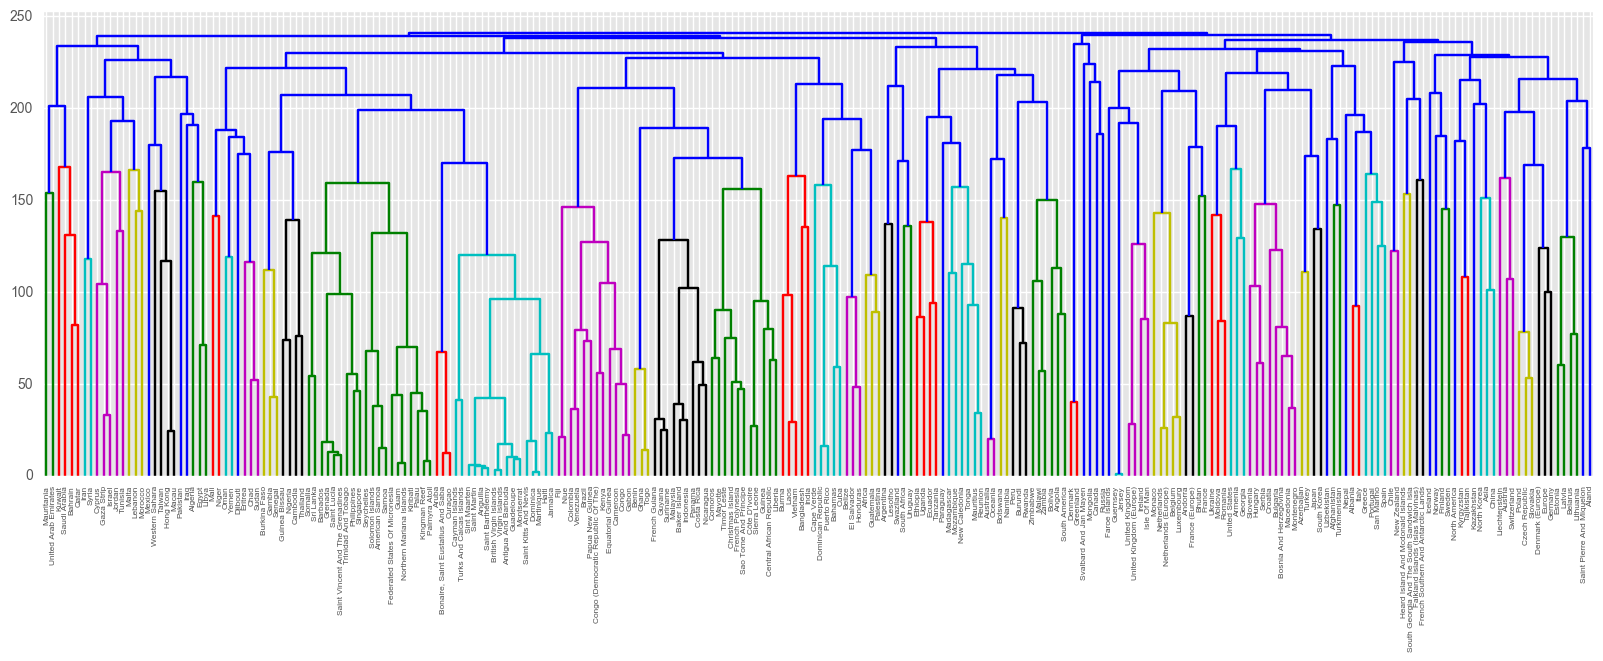

In [58]:
Clustering(clusterdf,20,6,"top",6)

#The horizontal graph is useful here to see the colors and therefore the links between countries

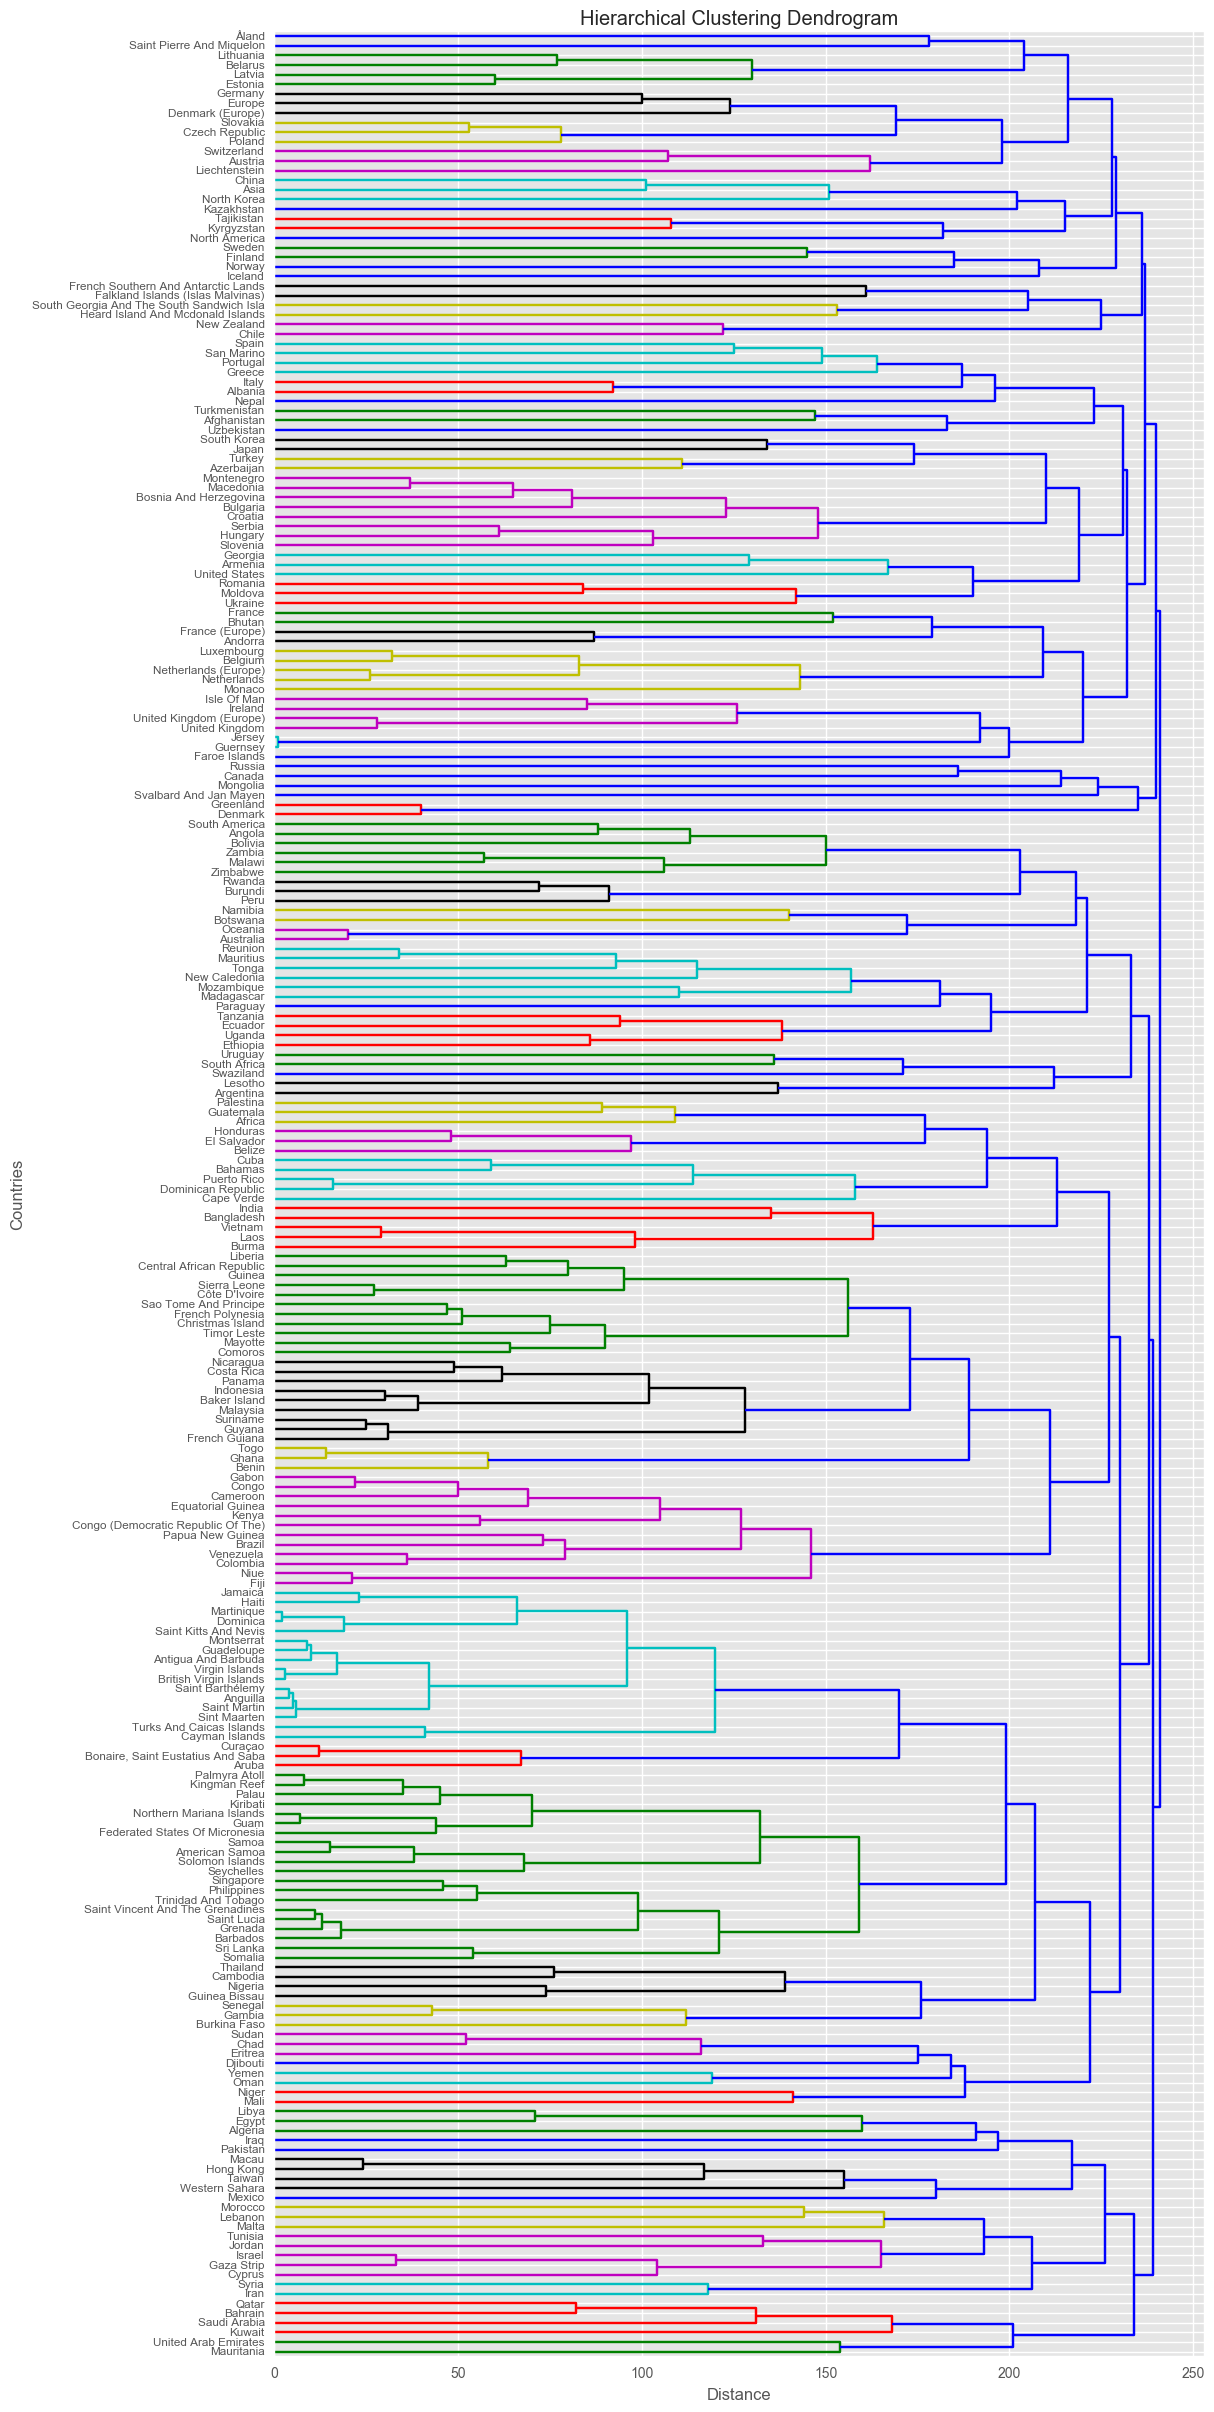

In [59]:
Clustering(clusterdf,12,30,"right",8.5)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Countries')
plt.xlabel('Distance')

#Now, even though scrolling is necessary, this vertical dendogram is much clearer

### 2nd Clustering

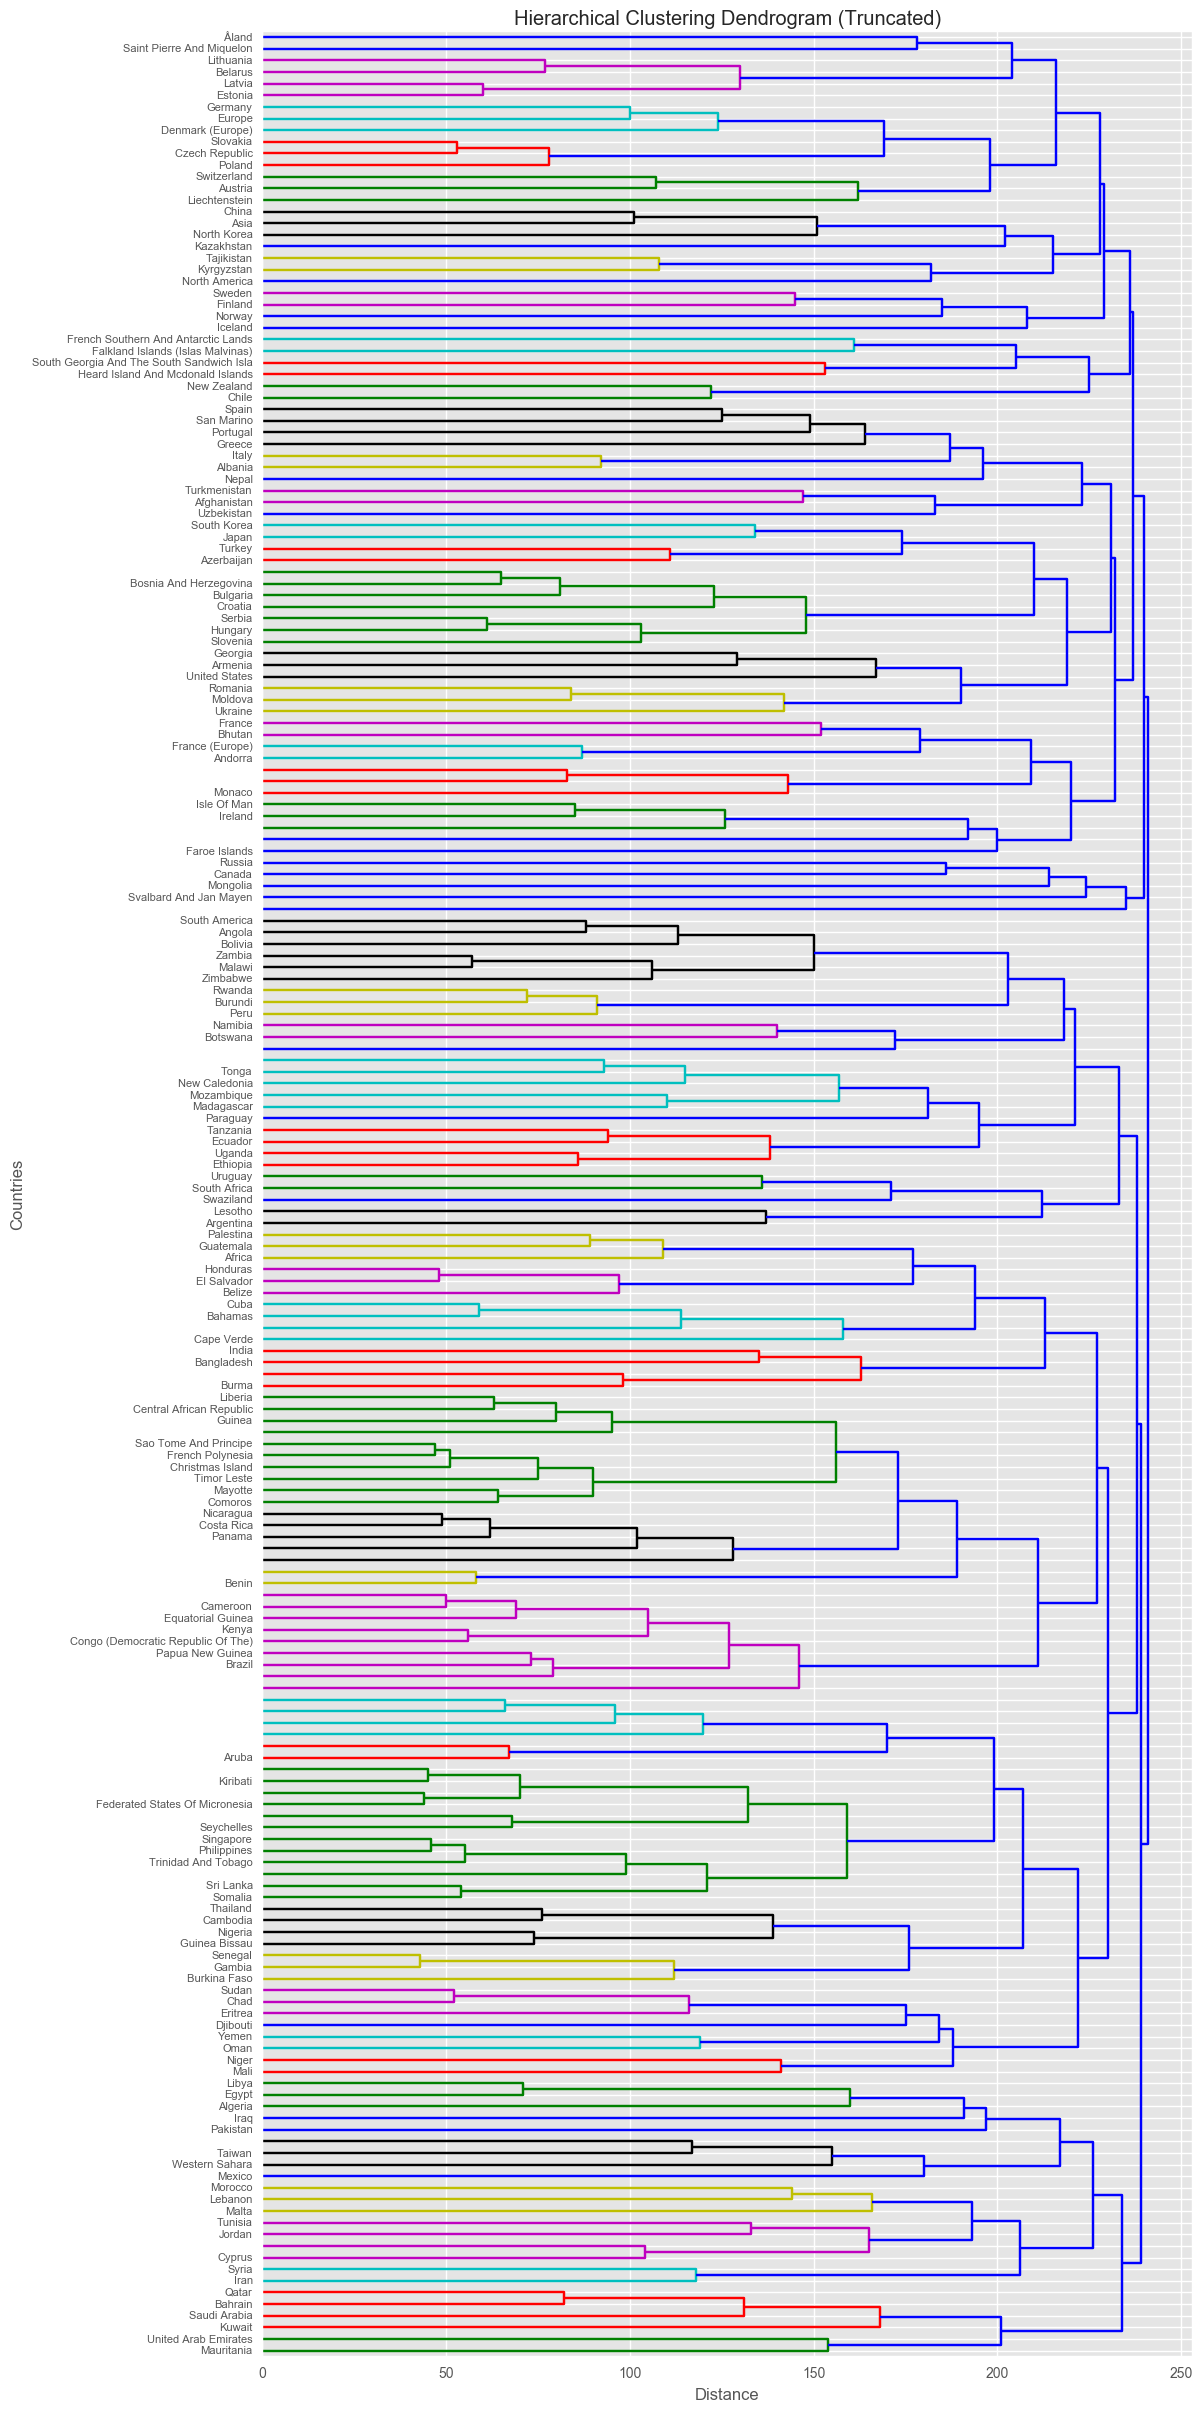

In [60]:
Cluster_70 = Clustering_truncated(clusterdf,12,30,"right",200,8)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Distance')
plt.ylabel('Countries')


In [61]:

def delete_symbol(l,sym):
    for i in range(l.count(sym)):
        l.remove(sym)
    return l, len(l)

In [62]:
cntry_to_del = delete_symbol(Cluster_70,'')
cntry_to_del

(['Mauritania',
  'United Arab Emirates',
  'Kuwait',
  'Saudi Arabia',
  'Bahrain',
  'Qatar',
  'Iran',
  'Syria',
  'Cyprus',
  'Jordan',
  'Tunisia',
  'Malta',
  'Lebanon',
  'Morocco',
  'Mexico',
  'Western Sahara',
  'Taiwan',
  'Pakistan',
  'Iraq',
  'Algeria',
  'Egypt',
  'Libya',
  'Mali',
  'Niger',
  'Oman',
  'Yemen',
  'Djibouti',
  'Eritrea',
  'Chad',
  'Sudan',
  'Burkina Faso',
  'Gambia',
  'Senegal',
  'Guinea Bissau',
  'Nigeria',
  'Cambodia',
  'Thailand',
  'Somalia',
  'Sri Lanka',
  'Trinidad And Tobago',
  'Philippines',
  'Singapore',
  'Seychelles',
  'Federated States Of Micronesia',
  'Kiribati',
  'Aruba',
  'Brazil',
  'Papua New Guinea',
  'Congo (Democratic Republic Of The)',
  'Kenya',
  'Equatorial Guinea',
  'Cameroon',
  'Benin',
  'Panama',
  'Costa Rica',
  'Nicaragua',
  'Comoros',
  'Mayotte',
  'Timor Leste',
  'Christmas Island',
  'French Polynesia',
  'Sao Tome And Principe',
  'Guinea',
  'Central African Republic',
  'Liberia',
  'Bur

In [63]:
clusterdf_new = clusterdf.drop(cntry_to_del[0], axis = 0)
clusterdf_new.head()

dt,1850-01-01 00:00:00,1850-02-01 00:00:00,1850-03-01 00:00:00,1850-04-01 00:00:00,1850-05-01 00:00:00,1850-06-01 00:00:00,1850-07-01 00:00:00,1850-08-01 00:00:00,1850-09-01 00:00:00,1850-10-01 00:00:00,...,2012-11-01 00:00:00,2012-12-01 00:00:00,2013-01-01 00:00:00,2013-02-01 00:00:00,2013-03-01 00:00:00,2013-04-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00
Country,,,,,,,,,,,,,,,,,,,,,
American Samoa,26.6080,26.6080,26.6080,26.6080,26.6080,26.6080,26.6080,26.6080,26.6080,26.6080,...,27.963,27.316,27.241,27.793,27.683,27.824,28.045,27.650,26.902,27.000
Anguilla,24.0750,24.9850,25.0640,24.8590,25.7340,27.0730,27.9220,27.9490,27.6960,26.7010,...,28.203,26.476,25.919,25.899,26.187,26.679,27.667,28.414,28.904,29.235
Antigua And Barbuda,23.9300,24.8450,24.9840,24.8790,25.7110,26.9880,27.7140,27.6720,27.3460,26.3510,...,27.890,26.329,25.787,25.802,26.089,26.601,27.706,28.322,28.712,28.978
Australia,22.1295,22.1295,22.1295,22.1295,22.1295,22.1295,22.1295,22.1295,22.1295,22.1295,...,26.935,28.417,29.861,28.311,26.590,23.305,19.377,16.018,15.933,17.748
Baker Island,23.9360,25.6200,25.5020,24.8770,24.4230,24.7920,25.1930,25.2040,24.5670,24.0700,...,26.182,26.518,26.284,26.637,27.296,26.783,26.530,26.552,25.666,25.706


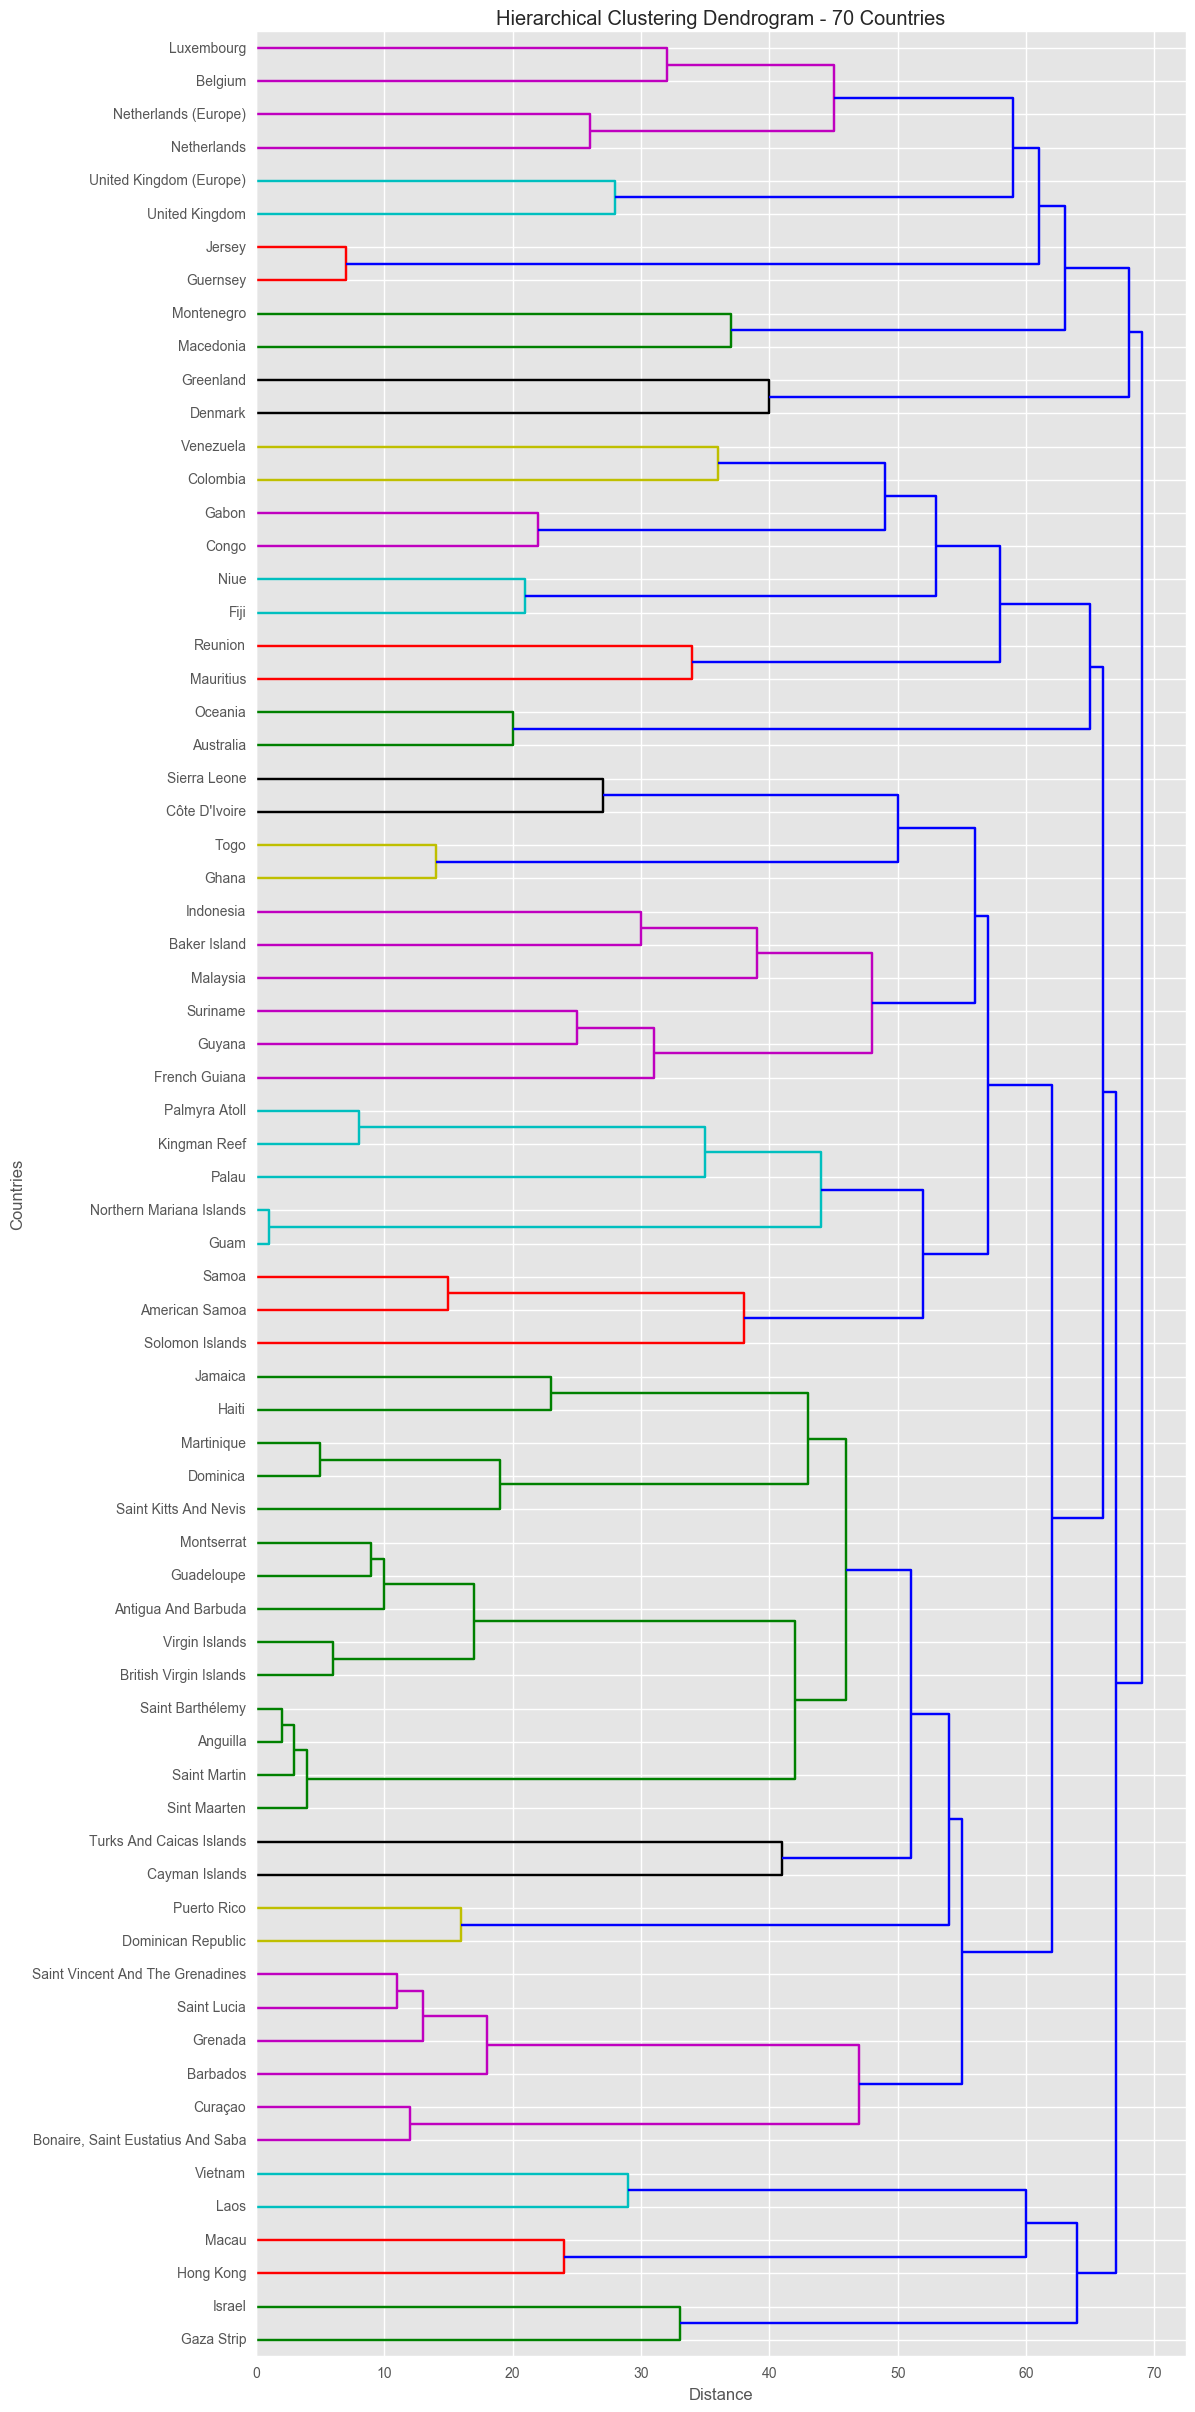

In [64]:
Clustering(clusterdf_new,12,30,"right",10)
plt.title('Hierarchical Clustering Dendrogram - 70 Countries')
plt.xlabel('Distance')
plt.ylabel('Countries')


## Conclusion on Paris

In [65]:
#Import of Paris'data

import pandas as pd
df=pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df_Paris=df[df.City == 'Paris']
df_Paris=df_Paris.dropna()
df_Paris=df_Paris.drop(df_Paris.columns[2:], axis=1)

#Starts at 1800 

df_Paris=df_Paris.iloc[602:]



In [66]:
#Building of a new Dataframe adapted to the map

date=df_Paris['dt'].apply(lambda x: x[:4])
years = np.unique(date)
mean_temps_Paris=[]

for y in years:
    
    mean_temps_Paris.append(df_Paris[y==date]['AverageTemperature'].mean())

jan=[]
for i in range(0,2562,12):
        jan.append(df_Paris.iloc[i]['AverageTemperature'])  
feb=[]
for i in range(1,2562,12):
        feb.append(df_Paris.iloc[i]['AverageTemperature'])
mar=[]
for i in range(2,2562,12):
        mar.append(df_Paris.iloc[i]['AverageTemperature'])
apr=[]
for i in range(3,2562,12):
        apr.append(df_Paris.iloc[i]['AverageTemperature'])
may=[]
for i in range(4,2562,12):
        may.append(df_Paris.iloc[i]['AverageTemperature'])
jun=[]
for i in range(5,2562,12):
        jun.append(df_Paris.iloc[i]['AverageTemperature'])
jul=[]
for i in range(6,2562,12):
        jul.append(df_Paris.iloc[i]['AverageTemperature'])
aug=[]
for i in range(7,2562,12):
        aug.append(df_Paris.iloc[i]['AverageTemperature'])
sep=[]
for i in range(8,2562,12):
        sep.append(df_Paris.iloc[i]['AverageTemperature'])
octb=[]
for i in range(9,2562,12):
        octb.append(df_Paris.iloc[i]['AverageTemperature'])
nov=[]
for i in range(10,2562,12):
        nov.append(df_Paris.iloc[i]['AverageTemperature'])
dec=[]
for i in range(11,2562,12):
        dec.append(df_Paris.iloc[i]['AverageTemperature'])

#New Dataframe

df_Paris=pd.DataFrame({'Annual':pd.Series(mean_temps_Paris),'Year':years,'Jan':pd.Series(jan),
                       'Feb':pd.Series(feb),'Mar':pd.Series(mar),'Apr':pd.Series(apr),'May':pd.Series(may),
                      'Jun':pd.Series(jun),'Jul':pd.Series(jul),'Aug':pd.Series(aug),'Sep':pd.Series(sep),'Oct':pd.Series(octb),
                      'Nov':pd.Series(nov),'Dec':pd.Series(dec)})

df_Paris=df_Paris[['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Annual']]
df_Paris=df_Paris.dropna()

In [67]:
#Interactive map with monthly average temperatures in Paris since 1800

from collections import OrderedDict
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import (ColumnDataSource, figure)
from bokeh.models import HoverTool

output_notebook()

# Read in the data with pandas. Convert the year column to string
df_Paris['Year'] = [str(x) for x in df_Paris['Year']]
years = list(df_Paris['Year'])
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df_Paris = df_Paris.set_index('Year')

# this is the colormap from the original plot

colors = ["#75968f", "#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce",
          "#ddb7b1", "#cc7878", "#933b41", "#550b1d","#75968f","#75968f"]

# Set up the data for plotting. We will need to have values for every
# pair of year/month names. Map the Temperature to a color.

def mapping_to_colors(x):
    if x<=0:
        return 1
    elif x>=0 and x<4:
        return 2
    elif x>=4 and x<8:
        return 3
    elif x>=8 and x<12:
        return 4
    elif x>=12 and x<14:
        return 5
    elif x>=14 and x<19:
        return 6
    elif x>=19 and x<22:
        return 7
    else:
        return 8

month = []
year = []
color = []
Temperature = []
for y in years:
    for m in months:
        month.append(m)
        year.append(y)
        Monthly_Temperature = df_Paris[m][y]
        Temperature.append(Monthly_Temperature)
        color.append(colors[mapping_to_colors(Monthly_Temperature)])

source = ColumnDataSource(
    data=dict(month=month, year=year, color=color, Temperature=Temperature)
)

TOOLS = "resize,hover,save,pan,box_zoom,wheel_zoom"

#Display parameters
p = figure(title="Paris Temperature (1800 - 2012)",
    x_range=years, y_range=list(reversed(months)),
    x_axis_location="above", plot_width=3000, plot_height=500,
    toolbar_location="below", tools=TOOLS,)

p.rect("year", "month", 1, 1, source=source,
    color="color", line_color=None)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

#Hovers parameters
hover = p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ('date', '@month @year'),
    ('Temperature', '@Temperature'),])

show(p)      


Loading BokehJS ...